# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
np.random.seed(0)

# Data

In [4]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Visualize Examples

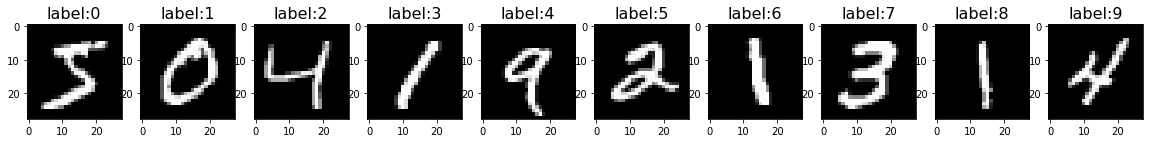

In [6]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
    sample = x_train[i]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title('label:{}'.format(i),  fontsize=16)

In [7]:
for i in range(0, 10):
    print(y_test[i])

7
2
1
0
4
1
4
9
5
9


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
def find_not_zero_elem_index(array):
    for i in range(0, len(array)):
        if array[i] == 1:
            return i
        
        
for i in range(0, 10):
    print(y_test[i], 'index of notzero element', find_not_zero_elem_index(y_test[i]))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] index of notzero element 7
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] index of notzero element 2
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] index of notzero element 1
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] index of notzero element 0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] index of notzero element 4
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] index of notzero element 1
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] index of notzero element 4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] index of notzero element 9
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] index of notzero element 5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] index of notzero element 9


# Trying to visualise array

# normalize Data
num_visualisation = x_train[1].copy()


for i in range(0, 28):
    for j in range(0, 28):
        num_visualisation[i][j] = str(num_visualisation[i][j])

print(num_visualisation.shape)

for i in range(0, 28):
    for j in range(0, 28):
        if num_visualisation[i][j] == '0':
            num_visualisation[i][j] = '000'
        
            

for i in range(0, 28):
    print(num_visualisation[i])

# Prepare data

In [10]:
# normalise data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
# reshape data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape)

(60000, 784)


# Create Model - Fully Connected Neural Network

In [12]:
model = Sequential()

In [13]:
model.add(Dense(units = 128, input_shape=(784,), activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
print(128*784 + 128 * 128 + 128 * 10)

118016


# Train

In [15]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size = batch_size, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.5857 - accuracy: 0.8286
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2212 - accuracy: 0.9358
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1636 - accuracy: 0.9521
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1281 - accuracy: 0.9629
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1054 - accuracy: 0.9689
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0890 - accuracy: 0.9726
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0758 - accuracy: 0.9773
Epoch 8/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0679 - accuracy: 0.9787
Epoch 9/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0598 - accuracy: 0.9815
Epoch 10/10
60000/60000 [==============================

# Evaluate

In [16]:
a = np.array([10, 12, 24, 1, 4, 6])
print(np.argmax(a))

2


In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:{}, Test accuracy:{}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 74us/step
Test loss:0.06914133369673509, Test accuracy:0.9787999987602234


In [18]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

[[2.34689310e-07 2.59507124e-06 2.44463827e-05 ... 9.99736726e-01
  5.62925891e-07 2.28826025e-06]
 [3.51887911e-06 1.04790408e-04 9.99736130e-01 ... 1.83720399e-08
  1.12630460e-05 1.06873319e-08]
 [1.43437899e-06 9.97375131e-01 1.71453095e-04 ... 1.38004636e-03
  3.84723680e-04 8.30315093e-06]
 ...
 [5.72156322e-09 2.25666219e-09 5.29436182e-11 ... 1.31922718e-06
  3.28479985e-07 1.44354262e-05]
 [7.03142655e-09 3.64746100e-08 6.03518568e-10 ... 8.24352586e-09
  1.47318715e-05 9.08309339e-09]
 [7.01017644e-09 1.33257669e-10 9.98849092e-09 ... 5.93747135e-11
  8.13125955e-10 2.75118789e-10]]
[7 2 1 ... 4 5 6]


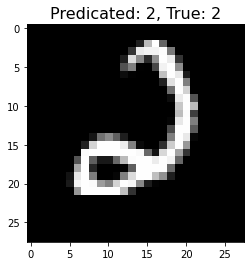

In [19]:
# Single Example
random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_index]
y_sample_pred_class = y_pred_classes[random_index]

plt.title('Predicated: {}, True: {}'.format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# Confusion Matrix

In [20]:
import seaborn as sns

In [28]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

confusion_mtx


array([[ 969,    0,    2,    0,    1,    1,    4,    1,    2,    0],
       [   0, 1123,    3,    1,    0,    1,    1,    1,    5,    0],
       [   4,    2, 1005,    3,    2,    0,    2,    9,    4,    1],
       [   0,    0,    3,  989,    0,    5,    0,    6,    4,    3],
       [   0,    0,    3,    1,  959,    0,    4,    3,    1,   11],
       [   2,    1,    0,    7,    1,  874,    3,    0,    2,    2],
       [   3,    3,    0,    1,    5,    7,  937,    0,    2,    0],
       [   0,    3,    9,    3,    0,    0,    0, 1007,    1,    5],
       [   3,    0,    2,    6,    4,    4,    2,    5,  944,    4],
       [   2,    3,    0,    7,    7,    3,    1,    5,    0,  981]])

Text(0.5, 1.0, 'Confusion matrix')

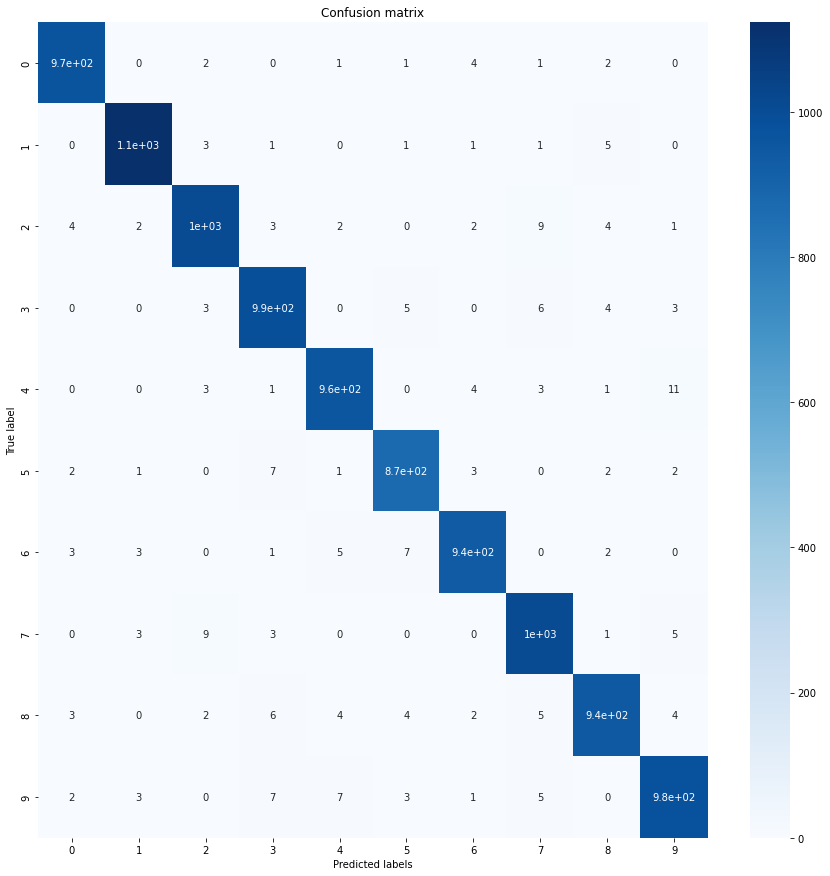

In [37]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(confusion_mtx, annot=True,ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True label')
ax.set_title('Confusion matrix')


# Investigate some errors

In [46]:
# finds the values, where the predicted classes are not the same true classes
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]


In [45]:
errors[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [42]:
errors.shape

(10000,)

In [43]:
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6])

In [48]:
y_pred_errors[1]

array([4.2675634e-05, 2.3408115e-06, 2.4108536e-07, 1.2666779e-07,
       4.8399979e-06, 6.1687678e-01, 3.7773615e-01, 8.6656549e-09,
       5.3198389e-03, 1.6953547e-05], dtype=float32)

In [49]:
y_true_errors[1]

6

In [50]:
y_pre_errors_probobility = np.max(y_pred_errors, axis =1)
true_probobility_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true  =y_pre_errors_probobility - true_probobility_errors

In [51]:
# get list indexes of sorted differences
sorted_indexes_diff_errors = np.argsort(diff_errors_pred_true)
top_indexes_diff_errors = sorted_indexes_diff_errors[-5:] # 5 last ones

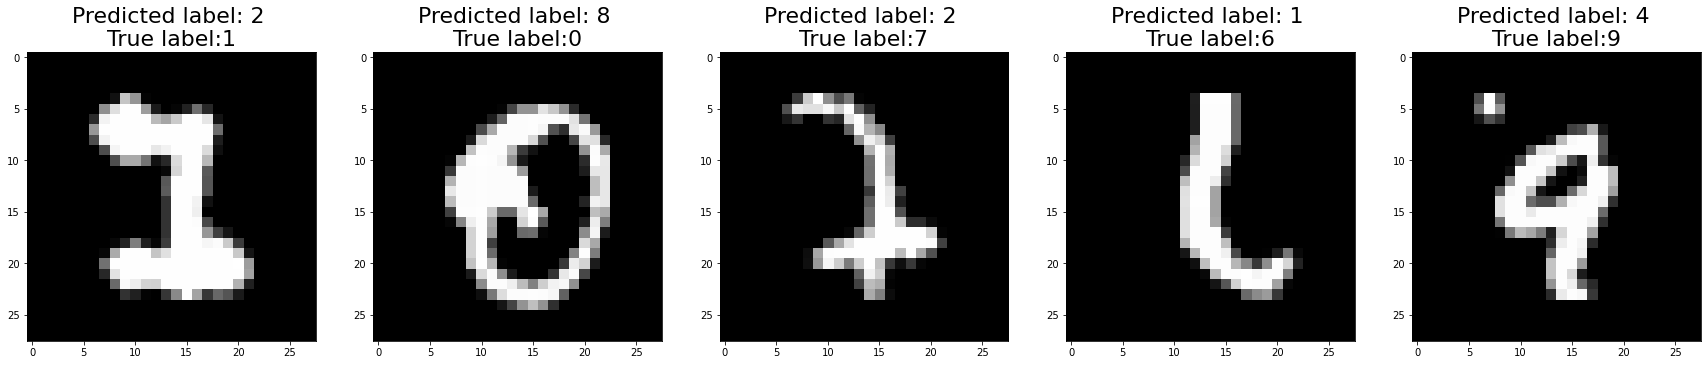

In [53]:
# Show top errors
num = len(top_indexes_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30, 30))

for i in range(0, num):
    index = top_indexes_diff_errors[i]
    sample = x_test_errors[index].reshape(28, 28)
    y_t = y_true_errors[index]
    y_p = y_pred_classes_errors[index]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title('Predicted label: {} \nTrue label:{}'.format(y_p, y_t), fontsize = 22)
    